In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning

In [2]:
# Reading merged data Arabica 98% and Robusta 2% of records
df_quality = pd.read_csv("data/merged_data_cleaned.csv")
df_quality.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
################### Quality Measures - Features ####################
# Aroma
# Flavor
# Aftertaste
# Acidity
# Body
# Balance
# Uniformity
# Cup Cleanliness
# Sweetness
# Moisture
# Defects
################### Bean Metadata - Labels ####################
# Species (arabica / robusta)
# Country of Origin
# Processing.Method'

df_quality = df_quality[['Processing.Method', 'Country.of.Origin', 'Species', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 
                         'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
                         'Moisture', 'Category.One.Defects', 'Category.Two.Defects']]

In [4]:
# check for null values in data
df_quality.isnull().sum()

Processing.Method       170
Country.of.Origin         1
Species                   0
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Moisture                  0
Category.One.Defects      0
Category.Two.Defects      0
dtype: int64

In [5]:
# # From Data, it was evident that the only missing country was Columbia 
# # because the Owner "racafe & cia s.c.a" has records in Columbia only 
# # and In.Country.Partner column value "AlmacafÃ©" is only for Columbia and United States

# df_quality['Country.of.Origin'] = df_quality['Country.of.Origin'].fillna('Colombia')
# # Checking again for null values in 'Country.of.Origin' column
# df_quality['Country.of.Origin'].isnull().sum()

In [6]:
df_quality.dropna(inplace=True)

In [7]:
# checking again for null values in data
df_quality.isnull().sum()

Processing.Method       0
Country.of.Origin       0
Species                 0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Moisture                0
Category.One.Defects    0
Category.Two.Defects    0
dtype: int64

Data is not fully normaly distributed. There is skewness. Algorithms will perform better with a normalized or scaled dataset.

There are outliers in data, so better to select Models which are insensitive to outliers like SVC, Decision Tree, and Ensembling Techniques

### Label Encoding columns with not numeric values

In [8]:
df_qual = df_quality.copy()
from sklearn.preprocessing import LabelEncoder

df_qual = df_qual.apply(LabelEncoder().fit_transform)

<AxesSubplot:>

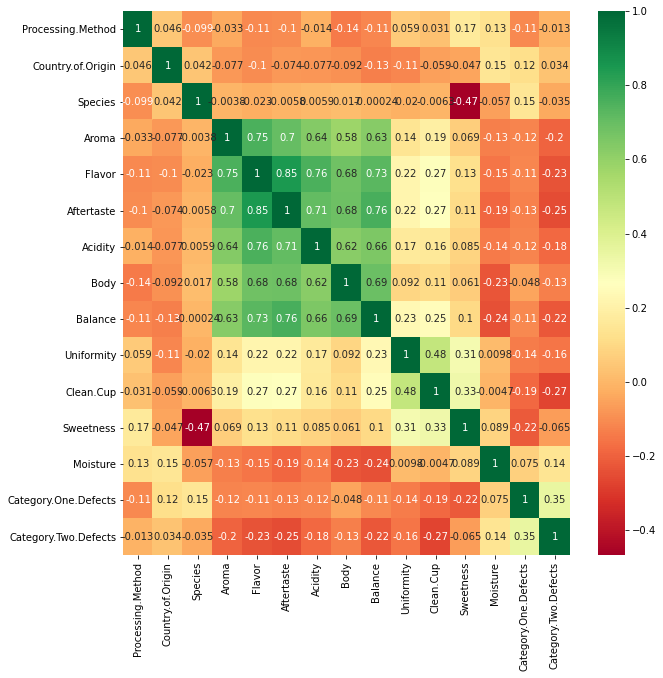

In [9]:
# correlation matrix
corr_mat = df_qual.corr()
top_corr_features = corr_mat.index
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
# heatmap
sns.heatmap(df_qual[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [10]:
# From the Correlation heatmap we can see Flavor column is highly correlated to many other features
# So we can remove that feature from training the model. It improved overall accuracy by 2% 
# but after SMOTE it doesn't matter

df_quality.drop('Flavor', axis = 1, inplace = True) 
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1338
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Processing.Method     1169 non-null   object 
 1   Country.of.Origin     1169 non-null   object 
 2   Species               1169 non-null   object 
 3   Aroma                 1169 non-null   float64
 4   Aftertaste            1169 non-null   float64
 5   Acidity               1169 non-null   float64
 6   Body                  1169 non-null   float64
 7   Balance               1169 non-null   float64
 8   Uniformity            1169 non-null   float64
 9   Clean.Cup             1169 non-null   float64
 10  Sweetness             1169 non-null   float64
 11  Moisture              1169 non-null   float64
 12  Category.One.Defects  1169 non-null   int64  
 13  Category.Two.Defects  1169 non-null   int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 137.0+ KB


## Select your features (columns)

In [11]:
# Set features. This will also be used as your x values.
X = df_quality.iloc[:, 1:14]
y = df_quality.iloc[:, 0]
print(X.shape, y.shape)

(1169, 13) (1169,)


In [12]:
# Checking for imbalanced Dataset
df_quality['Processing.Method'].value_counts()

Washed / Wet                 815
Natural / Dry                258
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing.Method, dtype: int64

In [13]:
X_encoded = X.apply(LabelEncoder().fit_transform)

# Train Test Split

In [14]:
# Creating train test split on oversampled data
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_encoded, y, random_state=13, test_size=0.2)

## Pre-processing
Scale and Normalize the data using the StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train_full)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train_full)
X_test_scaled = X_scaler.transform(X_test)

#### Imbalanced Dataset
##### Synthethetic Minority Over sampling Technique (SMOTE)

In [16]:
# Over sampling
from imblearn.over_sampling import SMOTE
sampling_strategy= {'Washed / Wet': 1000, 'Natural / Dry': 1000, 'Semi-washed / Semi-pulped': 1000, 'Other': 1000, 'Pulped natural / honey': 1000}
synth = SMOTE(random_state=13, sampling_strategy=sampling_strategy)
X_resampled, y_resampled = synth.fit_resample(X_train_scaled, y_train_full)

from collections import Counter
print("Before SMOTE count:" , Counter(y_train_full))
print("After SMOTE count:" , Counter(y_resampled))

Before SMOTE count: Counter({'Washed / Wet': 644, 'Natural / Dry': 217, 'Semi-washed / Semi-pulped': 45, 'Other': 18, 'Pulped natural / honey': 11})
After SMOTE count: Counter({'Washed / Wet': 1000, 'Natural / Dry': 1000, 'Semi-washed / Semi-pulped': 1000, 'Other': 1000, 'Pulped natural / honey': 1000})


C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1000) in class Washed / Wet will be larger than the number of samples in the majority class (class #Washed / Wet -> 644)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1000) in class Natural / Dry will be larger than the number of samples in the majority class (class #Washed / Wet -> 644)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1000) in class Semi-washed / Semi-pulped will be larger than the number of samples in the majority class (class #Washed / Wet -> 644)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWa

## Create a Train Validation Split After SMOTE

In [17]:
# Creating train test split on oversampled data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, random_state=13, test_size=0.1)

# Train the Model using SVC

In [18]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_val, y_val)}")

Training Data Score: 0.5875555555555556
Testing Data Score: 0.59


## Evaluate the Model using Confusion Matrix

Confusion matrix:
 [[48 12 11 28 11]
 [ 8 80  1  3  3]
 [ 8  7 87  3  0]
 [ 6 19  7 54 10]
 [17 24  8 19 26]]


C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


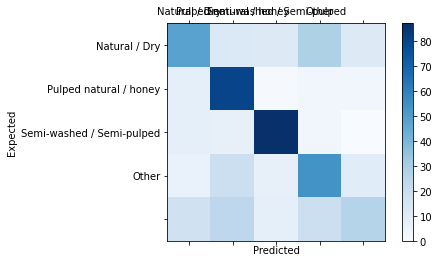

In [19]:
# Make predictions with the model
predictions = model.predict(X_val)  

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_val, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = df_quality['Processing.Method'].unique()
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Hyperparameter Tuning for SVC Model

In [20]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [50,100],
              'kernel': ['rbf','linear'],
              'gamma': [0.001, 0.01]}
grid = GridSearchCV(model, param_grid, cv=5)

In [21]:
# # Train the model with GridSearch
# # This will take the SVC model and try each combination of parameters

# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_score_)

# Decision Tree Model

In [22]:
from sklearn import tree

# Create and score a decision tree classifier
clfTree = tree.DecisionTreeClassifier(min_samples_split=4)
clf = clfTree.fit(X_train, y_train)

# Make predictions with the hypertuned model
treePredictions = clf.predict(X_val)
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, treePredictions))

                           precision    recall  f1-score   support

            Natural / Dry       0.83      0.82      0.82       110
                    Other       0.93      0.95      0.94        95
   Pulped natural / honey       0.94      0.96      0.95       105
Semi-washed / Semi-pulped       0.86      0.93      0.89        96
             Washed / Wet       0.84      0.74      0.79        94

                 accuracy                           0.88       500
                macro avg       0.88      0.88      0.88       500
             weighted avg       0.88      0.88      0.88       500



In [23]:
print(f"Test Accuracy: {clf.score(X_test_scaled, y_test)}")

Test Accuracy: 0.6367521367521367


# Random Forest Grid Search

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_params = {
    'model': RandomForestClassifier(random_state=5),
    'params' : {
        'n_estimators': [100,1000],  # no of trees
        'min_samples_split':[3, 4],
        'max_samples': [0.2, 0.5]
    }
}

RFclf =  GridSearchCV(model_params['model'], model_params['params'], cv=5, n_jobs=-1, return_train_score=False)
RFclf.fit(X_train, y_train)

print(RFclf.best_params_)
print(RFclf.best_score_)

{'max_samples': 0.5, 'min_samples_split': 3, 'n_estimators': 1000}
0.9326666666666668


In [25]:
print(f"Train Accuracy: {RFclf.score(X_train, y_train)}")
print(f"Validation Accuracy: {RFclf.score(X_val, y_val)}")

Train Accuracy: 0.996
Validation Accuracy: 0.95


In [26]:
print(f"Test Accuracy: {RFclf.score(X_test_scaled, y_test)}")

Test Accuracy: 0.7264957264957265
